<a href="https://colab.research.google.com/github/khwwang/coding-training/blob/master/230704_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀

단순선형회귀: 독립변수가 1개인 선형 회귀 -> 독립변수가 여러개면 다중선형회귀이다, x^2 + x^3처럼 제곱이 되어있는 것은 곡선회귀이므로 선형이 아니다

> 데이터를 잘 나타내는 직선은 예측값과 실제값의 차이(error)->최소화
잔차 제곱합 rss, mse등을 사용

> 회귀함수는 이러한 cost function을 최소가 되는 파라미터를 찾는 알고리즘이다

> 최소제곱법(sklearn의 linear regression에서는 normal equation을 이용)

> 경사 하강법: 점진적 학습
mse에 대한 그래프(error에 대한)에서 미분하여 가장 작은 것을 찾는 것
기울기(gradient)가 작아지는 방향으로 진행

> 학습률: 얼마만큼 학습해야 하는지 학습 양을 의미하며 한 번의 학습량으로 학습한 이후에 가중치 매개변수가 갱신된다
- 가중치 업데이트: 기울기를 계산한 후에 기울기 값을 기존 가중치(기울기)에 더하거나 빼서 가중치를 업데이트하는데 이때 계산된 기울기에 미리 설정해둔 학습률을 곱해서 나온 값으로 가중치를 업데이트하도록 한다

> convex funtion 볼록함수이고 매우 이상정인 cost function이라고 할 수 있다

> gradient 종류
- batch : 전체의 데이터를 이용
- stochastic : 램덤으로 하나의 뽑아서 이용
- mini batch : 몇개를 모아서 그룹을 설정한 데이터를 이용

다항회귀(polynomial regression) 직선이 아닐 경우 -> 곡선회귀와 같은말
- 문제점: 고차 다항식으로 회귀를 할대 과적합이 일어나기 쉽다(모델이 너무 복잡)
- 모델의 규제를 통해 차수를 줄인다

> 규제: ridge, lasso등의 규제가 있다
- 한번 자세히 살펴보자

# 로지스틱 회귀

비선형이고 시그모이드 함수를 통해 cost function을 구한다
확률을 이용한 cost function -> log likelihood

- cross entropy를 구하여 두 확률 분포 사이의 오차를 측정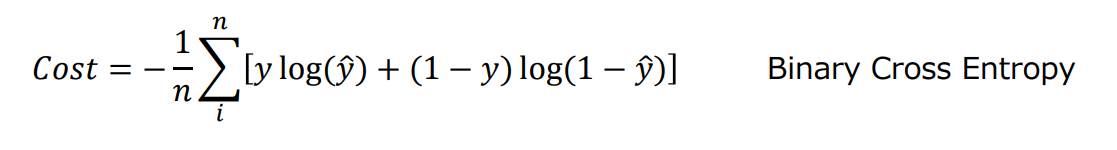

# 다중 분류(Categorical Cross Entropy)

soft max(다중 클래스 분류의 경우) 확률이 가장 높은 것을 정답으로 1로 한다
- sigmoid와 다른 점은 그저 확률로만 나오는 것이 아니라 정답이 나온다(one hot encoding)
- cross entropy를 cost로 사용한다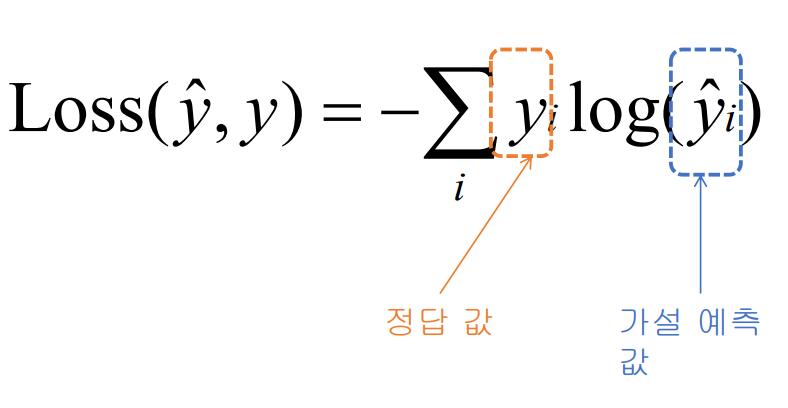

# Neural network

### perceptron
이진분류 -> 선형분류
- activation function: step funtion

> mlp(multilayered perceptron)
학습할때 w값을 찾기가 어렵다

- 오차 역전파(backpropagation)을 통하여 weight를 갱신시키는 방법
- 순전파(forwardpropagation)을 통해 계산(미분값도)하고 반대로 오면서 chain rule을 이용하여 weight를 갱신하는 방법으로 역전파를 사용
가지고있는 미분값(gradient 계산)을 통해 가중치 업데이트
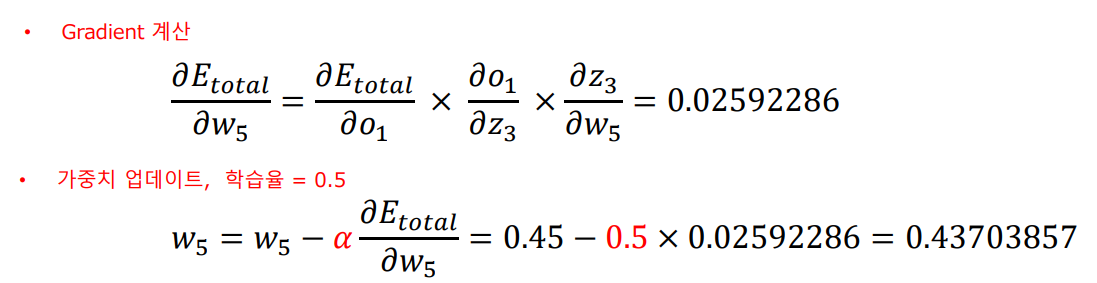

깊은 신경망의 경우 입력층으로 갈수록 역전파 과정에서 미분값이 사라지면서 학습이 안되는 현상

optimizer에서 gd에서 발전한 것이 sgd이고 기본적으로 성능이 좋은 adam을 사용한다

- cross validation: 교차검증은 검증을 데이터를 나눠서 진해앟고 평균을 내는 것인데 딥러닝에서는 시간이 오래 걸려서 많이 사용하지는 않는다

- 데이터 증강: 데이터가 없으면 과소적합이나 과적합이 생기므로 기존의 데이터를 변형한다(축소, 확대, 자르기 등)

- dropout: 모델의 다양성을 만들기 위한 방법으로 이해 (앙상블)

- 가중치 초기값 설정, 초기화(Xaiver Glorot 초기화, He 초기화)

- 배치 정규화 (Batch Normalization): 미니배치 단위 Output을 표준정규분포로 정규화하는 작업

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.12.0'

In [4]:
X_train =np.array([1., 2., 3., 4., 5., 6.])
y_train = np.array([9.,12.,15.,18.,21.,24.])

In [5]:
# 파라미터 초기화
W = tf.Variable(0.0)
b  =tf.Variable(0.0)

# 가설
y_hat = W * X_train + b

cost = tf.reduce_mean(tf.square(y_train - y_hat))

In [6]:
# 학습율
lr = 0.01

with tf.GradientTape() as tape:
  y_hat = W * X_train + b
  cost = tf.reduce_mean(tf.square(y_train - y_hat))

W_grad, b_grad = tape.gradient(cost, [W, b])
# update
W.assign_sub(lr*W_grad)
b.assign_sub(lr*b_grad)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.32999998>

In [10]:
# 파라미터 초기화
W = tf.Variable(0.0)
b  =tf.Variable(0.0)

# epoch돌리기
epochs = 5000
lr = 0.01

for i in range(epochs):
  with tf.GradientTape() as tape:
    y_hat = W * X_train + b
    cost = tf.reduce_mean(tf.square(y_train - y_hat))

    W_grad, b_grad = tape.gradient(cost, [W, b])
    # update
    W.assign_sub(lr*W_grad)
    b.assign_sub(lr*b_grad)

    if i%200 == 0:
      print('Epoch:', i , 'cost:', cost.numpy(), 'W:', W.numpy(), 'b:', b.numpy())

Epoch: 0 cost: 298.5 W: 1.3299999 b: 0.32999998
Epoch: 200 cost: 1.1257037 W: 3.5628922 b: 3.5901465
Epoch: 400 cost: 0.26079097 W: 3.2709315 b: 4.840088
Epoch: 600 cost: 0.06041649 W: 3.1304042 b: 5.441714
Epoch: 800 cost: 0.013996857 W: 3.0627668 b: 5.7312837
Epoch: 1000 cost: 0.0032424245 W: 3.03021 b: 5.870665
Epoch: 1200 cost: 0.0007511492 W: 3.0145404 b: 5.9377494
Epoch: 1400 cost: 0.00017403124 W: 3.006999 b: 5.970036
Epoch: 1600 cost: 4.0324994e-05 W: 3.003369 b: 5.9855766
Epoch: 1800 cost: 9.340783e-06 W: 3.0016217 b: 5.9930577
Epoch: 2000 cost: 2.1644023e-06 W: 3.0007808 b: 5.9966583
Epoch: 2200 cost: 5.027193e-07 W: 3.000376 b: 5.9983897
Epoch: 2400 cost: 1.173236e-07 W: 3.0001814 b: 5.9992223
Epoch: 2600 cost: 2.7551778e-08 W: 3.000088 b: 5.9996233
Epoch: 2800 cost: 6.3532752e-09 W: 3.0000422 b: 5.9998183
Epoch: 3000 cost: 1.4401849e-09 W: 3.0000205 b: 5.9999137
Epoch: 3200 cost: 8.8220986e-10 W: 3.0000157 b: 5.999933
Epoch: 3400 cost: 8.8220986e-10 W: 3.0000157 b: 5.999933

# Fully connected layer

In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
X_train =np.array([1., 2., 3., 4., 5., 6.])
y_train = np.array([9.,12.,15.,18.,21.,24.])

In [18]:
from tensorflow import keras
from keras import layers

model = keras.Sequential(
    layers.Dense(units=1, input_shape=(1,)),
)

In [19]:
from keras.engine.training import optimizer
# optimizer: sgd, adam
# cost: mse
# metrics: mse, mae
model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=['mse','mae']
)

In [22]:
model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=3,
    verbose=1
)

Epoch 1/1000
2/2 [==============================] - 1s 11ms/step - loss: 326.4970 - mse: 326.4970 - mae: 17.1785
Epoch 2/1000
2/2 [==============================] - 0s 8ms/step - loss: 72.3549 - mse: 72.3549 - mae: 8.3215
Epoch 3/1000
2/2 [==============================] - 0s 8ms/step - loss: 19.0105 - mse: 19.0105 - mae: 4.2986
Epoch 4/1000
2/2 [==============================] - 0s 7ms/step - loss: 7.3225 - mse: 7.3225 - mae: 2.3397
Epoch 5/1000
2/2 [==============================] - 0s 7ms/step - loss: 4.9365 - mse: 4.9365 - mae: 1.8142
Epoch 6/1000
2/2 [==============================] - 0s 8ms/step - loss: 4.2451 - mse: 4.2451 - mae: 1.7321
Epoch 7/1000
2/2 [==============================] - 0s 8ms/step - loss: 4.0879 - mse: 4.0879 - mae: 1.7158
Epoch 8/1000
2/2 [==============================] - 0s 7ms/step - loss: 4.2458 - mse: 4.2458 - mae: 1.7860
Epoch 9/1000
2/2 [==============================] - 0s 8ms/step - loss: 4.0011 - mse: 4.0011 - mae: 1.6707
Epoch 10/1000
2/2 [========

In [23]:
model.get_weights()

[array([[3.0006714]], dtype=float32), array([5.997183], dtype=float32)]

In [24]:
model.evaluate(X_train, y_train)

1/1 [==============================] - 1s 608ms/step - loss: 1.5331e-06 - mse: 1.5331e-06 - mae: 0.0011


[1.533086674498918e-06, 1.533086674498918e-06, 0.0010509490966796875]

In [25]:
# test
X_test = [10]

model.predict(X_test)

1/1 [==============================] - 0s 101ms/step


array([[36.0039]], dtype=float32)

# 선형회귀(예측)

In [26]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
mpg = pd.read_csv('auto-mpg.csv', na_values=['?', '-', ';']) #데이터 읽을때 ?나 - 같은 표시 nan으로

In [65]:
df = mpg.copy()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [67]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [69]:
df=df.dropna()

In [70]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [71]:
X = df.iloc[:,1:6] #cylinders  displacement    horsepower   weight   acceleration
y = df['mpg']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [76]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(units=32, activation='relu', input_shape=(5,)),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=1) #종속변수가 mpg로 하나이므로 출력 layer는 1
])

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                192       
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


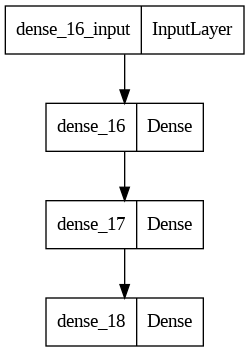

In [78]:
keras.utils.plot_model(model)

# compile

In [80]:
 model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse', 'mae']
 )

In [83]:
epochs = 100
batch_size = 32

model.fit(
    X_train_s, y_train,
    epochs = epochs,
    batch_size = batch_size,
    verbose = 1
)

Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 596.0766 - mse: 596.0766 - mae: 23.1586
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 549.4010 - mse: 549.4010 - mae: 22.1697
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 484.4275 - mse: 484.4275 - mae: 20.7332
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 402.6164 - mse: 402.6164 - mae: 18.8053
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 311.8309 - mse: 311.8309 - mae: 16.4104
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 227.5779 - mse: 227.5779 - mae: 13.7350
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 157.3080 - mse: 157.3080 - mae: 11.0674
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 109.1187 - mse: 109.1187 - mae: 8.8506
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 84.0368 - mse: 84.0368 -

In [85]:
model.evaluate(X_train_s, y_train)

10/10 [==============================] - 0s 6ms/step - loss: 14.6621 - mse: 14.6621 - mae: 2.8584


[14.662102699279785, 14.662102699279785, 2.858421802520752]

In [92]:
y_pred = model.predict(X_test_s)
y_pred = y_pred.reshape(-1,)

3/3 [==============================] - 0s 12ms/step


In [100]:
y_train

260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
       ... 
72     15.0
107    18.0
272    23.8
352    29.9
103    11.0
Name: mpg, Length: 313, dtype: float64

In [104]:
model = keras.Sequential([
    layers.Dense(units=32, activation='relu', input_shape=(5,)),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=1) #종속변수가 mpg로 하나이므로 출력 layer는 1
])

In [105]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse', 'mae']
 )

In [106]:
epochs = 100
batch_size = 32

history = model.fit(
    X_train_s, y_train,
    epochs = epochs,
    batch_size = batch_size,
    validation_split=0.2,
    verbose = 1
)

Epoch 1/100
8/8 [==============================] - 1s 46ms/step - loss: 584.4835 - mse: 584.4835 - mae: 22.7338 - val_loss: 663.1355 - val_mse: 663.1355 - val_mae: 24.4579
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 575.5333 - mse: 575.5333 - mae: 22.5117 - val_loss: 653.5670 - val_mse: 653.5670 - val_mae: 24.2439
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 565.7418 - mse: 565.7418 - mae: 22.2571 - val_loss: 642.9825 - val_mse: 642.9825 - val_mae: 23.9989
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 554.5839 - mse: 554.5839 - mae: 21.9648 - val_loss: 631.0683 - val_mse: 631.0683 - val_mae: 23.7095
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 542.2780 - mse: 542.2780 - mae: 21.6244 - val_loss: 617.3069 - val_mse: 617.3069 - val_mae: 23.3732
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 528.1149 - mse: 528.1149 - mae: 21.2226 - val_loss: 601.1207 - val_mse:

In [107]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

In [108]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
0,584.483521,584.483521,22.733809,663.135498,663.135498,24.457890,0
1,575.533325,575.533325,22.511660,653.566956,653.566956,24.243902,1
2,565.741821,565.741821,22.257097,642.982544,642.982544,23.998941,2
3,554.583862,554.583862,21.964846,631.068298,631.068298,23.709518,3
4,542.278015,542.278015,21.624388,617.306885,617.306885,23.373186,4
...,...,...,...,...,...,...,...
95,16.587162,16.587162,3.044141,14.856238,14.856238,2.805383,95
96,16.511187,16.511187,3.036433,14.770385,14.770385,2.801529,96
97,16.474401,16.474401,3.032139,14.696231,14.696231,2.797776,97
98,16.360373,16.360373,3.019833,14.615176,14.615176,2.795108,98


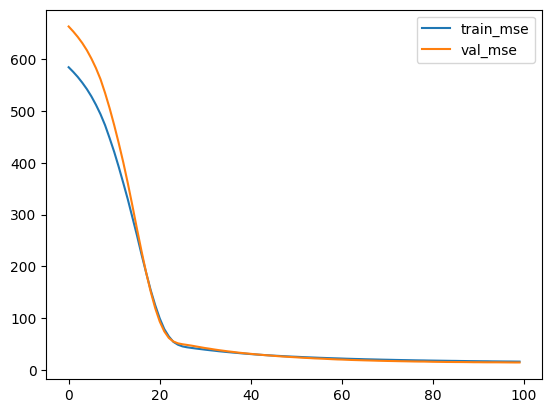

In [109]:
plt.plot(hist['epoch'], hist['mse'], label='train_mse')
plt.plot(hist['epoch'], hist['val_mse'], label='val_mse')
plt.legend()
plt.show()

# insurance data

In [115]:
insurance = pd.read_csv('insurance.csv')
df = insurance.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [116]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [119]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [125]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [141]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df['']

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int64

In [127]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,:6]
y = df['charges']

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [130]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(units=32, activation='relu', input_shape=(6,)),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=1) #종속변수가 charges로 하나이므로 출력 layer는 1
])

In [131]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                224       
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [139]:
 model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse', 'mae']
 )

In [140]:
epochs = 100
batch_size = 12

model.fit(
    X_train_s, y_train,
    epochs = epochs,
    batch_size = batch_size,
    validation_split=0.2,
    verbose = 1
)

Epoch 1/100
72/72 [==============================] - 1s 6ms/step - loss: 35643056.0000 - mse: 35643056.0000 - mae: 4101.2280 - val_loss: 32437090.0000 - val_mse: 32437090.0000 - val_mae: 3769.0503
Epoch 2/100
72/72 [==============================] - 0s 2ms/step - loss: 35599616.0000 - mse: 35599616.0000 - mae: 4095.2283 - val_loss: 32455398.0000 - val_mse: 32455398.0000 - val_mae: 3767.0845
Epoch 3/100
72/72 [==============================] - 0s 3ms/step - loss: 35576588.0000 - mse: 35576588.0000 - mae: 4092.0000 - val_loss: 32446852.0000 - val_mse: 32446852.0000 - val_mae: 3767.5415
Epoch 4/100
72/72 [==============================] - 0s 3ms/step - loss: 35562032.0000 - mse: 35562032.0000 - mae: 4093.2961 - val_loss: 32461888.0000 - val_mse: 32461888.0000 - val_mae: 3768.6477
Epoch 5/100
72/72 [==============================] - 0s 3ms/step - loss: 35514304.0000 - mse: 35514304.0000 - mae: 4088.2383 - val_loss: 32468710.0000 - val_mse: 32468710.0000 - val_mae: 3769.9871
Epoch 6/100
72/

In [142]:
model.evaluate(X_train_s, y_train)

34/34 [==============================] - 0s 2ms/step - loss: 33528010.0000 - mse: 33528010.0000 - mae: 3909.6204


[33528010.0, 33528010.0, 3909.620361328125]

In [143]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

In [144]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
0,584.483521,584.483521,22.733809,663.135498,663.135498,24.457890,0
1,575.533325,575.533325,22.511660,653.566956,653.566956,24.243902,1
2,565.741821,565.741821,22.257097,642.982544,642.982544,23.998941,2
3,554.583862,554.583862,21.964846,631.068298,631.068298,23.709518,3
4,542.278015,542.278015,21.624388,617.306885,617.306885,23.373186,4
...,...,...,...,...,...,...,...
95,16.587162,16.587162,3.044141,14.856238,14.856238,2.805383,95
96,16.511187,16.511187,3.036433,14.770385,14.770385,2.801529,96
97,16.474401,16.474401,3.032139,14.696231,14.696231,2.797776,97
98,16.360373,16.360373,3.019833,14.615176,14.615176,2.795108,98


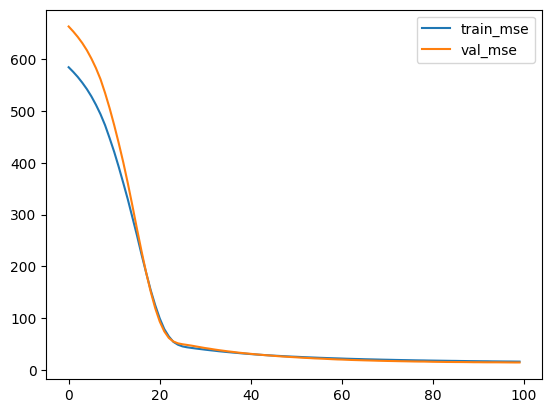

In [145]:
plt.plot(hist['epoch'], hist['mse'], label='train_mse')
plt.plot(hist['epoch'], hist['val_mse'], label='val_mse')
plt.legend()
plt.show()